In [467]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

'2019-03-27 14:29:15.870050'

In [468]:
StClair_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_StClair.csv')
CentralBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_CentralBasin.csv')
EasternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_EasternBasin.csv')
WesternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_WesternBasin.csv')

StClair_ERA5['evap'] = -StClair_ERA5['evap']
CentralBasin_ERA5['evap'] = -CentralBasin_ERA5['evap']
EasternBasin_ERA5['evap'] = -EasternBasin_ERA5['evap']
WesternBasin_ERA5['evap'] = -WesternBasin_ERA5['evap']

CentralBasin_ERA5.describe()

for c in StClair_ERA5.columns[1:]:
    StClair_ERA5[c] = StClair_ERA5[c] * (StClair_ERA5[c] > -100)

StClair_ERA5['date'] = pd.to_datetime(StClair_ERA5['date'], errors='coerce')
StClair_ERA5['year'] = StClair_ERA5.date.dt.year
# StClair_ERA5 = StClair_ERA5.groupby(['year']).mean()

# StClair_ERA5['precip'] = StClair_ERA5['precip']*365
# StClair_ERA5['evap'] = StClair_ERA5['evap']*365
# StClair_ERA5['surf_runoff'] = StClair_ERA5['evap']*365

StClair_ERA5

for c in WesternBasin_ERA5.columns[1:]:
    WesternBasin_ERA5[c] = WesternBasin_ERA5[c] * (WesternBasin_ERA5[c] > -100)

WesternBasin_ERA5['date'] = pd.to_datetime(WesternBasin_ERA5['date'], errors='coerce')
WesternBasin_ERA5['year'] = WesternBasin_ERA5.date.dt.year
# WesternBasin_ERA5 = WesternBasin_ERA5.groupby(['year']).mean()

# WesternBasin_ERA5['precip'] = WesternBasin_ERA5['precip']*365
# WesternBasin_ERA5['evap'] = WesternBasin_ERA5['evap']*365
# WesternBasin_ERA5['surf_runoff'] = WesternBasin_ERA5['surf_runoff']*365

WesternBasin_ERA5

for c in CentralBasin_ERA5.columns[1:]:
    CentralBasin_ERA5[c] = CentralBasin_ERA5[c] * (CentralBasin_ERA5[c] > -100)

CentralBasin_ERA5['date'] = pd.to_datetime(CentralBasin_ERA5['date'], errors='coerce')
CentralBasin_ERA5['year'] = CentralBasin_ERA5.date.dt.year
# CentralBasin_ERA5 = CentralBasin_ERA5.groupby(['year']).mean()

# CentralBasin_ERA5['precip'] = CentralBasin_ERA5['precip']*365
# CentralBasin_ERA5['evap'] = CentralBasin_ERA5['evap']*365
# CentralBasin_ERA5['surf_runoff'] = CentralBasin_ERA5['surf_runoff']*365

CentralBasin_ERA5

for c in EasternBasin_ERA5.columns[1:]:
    EasternBasin_ERA5[c] = EasternBasin_ERA5[c] * (EasternBasin_ERA5[c] > -100)

EasternBasin_ERA5['date'] = pd.to_datetime(EasternBasin_ERA5['date'], errors='coerce')
EasternBasin_ERA5['year'] = EasternBasin_ERA5.date.dt.year
# EasternBasin_ERA5 = EasternBasin_ERA5.groupby(['year']).mean()

# EasternBasin_ERA5['precip'] = EasternBasin_ERA5['precip']*365
# EasternBasin_ERA5['evap'] = EasternBasin_ERA5['evap']*365
# EasternBasin_ERA5['surf_runoff'] = EasternBasin_ERA5['surf_runoff']*365

EasternBasin_ERA5

,date,precip,cloud,evap,surf_runoff,year
0,2002-01-01,2.236307e+00,0.716296,2.667775,0.000000e+00,2002
1,2002-01-02,2.103122e-01,0.401624,2.240147,-4.163336e-14,2002
2,2002-01-03,1.078426e-01,0.823043,2.216830,0.000000e+00,2002
3,2002-01-04,1.122731e-01,0.768728,2.686401,8.326673e-14,2002
4,2002-01-05,1.450323e-01,0.911535,2.574709,4.120113e-04,2002
5,2002-01-06,4.514021e+00,0.983722,1.093649,2.404620e-03,2002
6,2002-01-07,4.626530e+00,0.914706,1.536369,1.747901e-04,2002
7,2002-01-08,7.332956e-02,0.833909,2.707317,-4.163336e-14,2002
8,2002-01-09,1.959288e+00,0.730232,1.533773,6.096490e-02,2002
9,2002-01-10,3.583337e-02,0.836911,0.112472,5.877946e-02,2002


In [469]:
EasternBasin_ERA5.columns

Index(['date', 'precip', 'cloud', 'evap', 'surf_runoff', 'year'], dtype='object')

In [470]:
for c in ['precip', 'cloud', 'evap', 'surf_runoff']:
    EasternBasin_ERA5 = EasternBasin_ERA5[EasternBasin_ERA5[c] < 100] 
    CentralBasin_ERA5 = CentralBasin_ERA5[CentralBasin_ERA5[c] < 100] 
    WesternBasin_ERA5 = WesternBasin_ERA5[WesternBasin_ERA5[c] < 100] 

In [471]:
EasternBasin_ERA5_m = EasternBasin_ERA5.groupby(pd.Grouper(key='date', freq='M')).mean()[['precip', 'cloud', 'evap', 'surf_runoff']]*365/12
CentralBasin_ERA5_m = CentralBasin_ERA5.groupby(pd.Grouper(key='date', freq='M')).mean()[['precip', 'cloud', 'evap', 'surf_runoff']]*365/12
WesternBasin_ERA5_m = WesternBasin_ERA5.groupby(pd.Grouper(key='date', freq='M')).mean()[['precip', 'cloud', 'evap', 'surf_runoff']]*365/12

In [472]:
nino4 = pd.read_csv('../../measurements/Oscillations/nino4.csv', skiprows=8)
# nino4 = nino4[nino4.Mean>-80]


for c in nino4.columns:
    nino4[c] = pd.to_numeric(nino4[c], errors='coerce')


nino4.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1870,-0.48,-1.16,-1.01,-1.00,-1.08,-1.11,-0.98,-0.86,-0.44,-0.51,-0.62,-0.67
1,1871,-0.55,-0.41,-0.44,-0.40,-0.70,-0.71,-0.87,-0.55,-0.45,-0.43,-0.52,-0.72
2,1872,-0.76,-0.51,-0.39,-0.68,-0.61,-0.79,-0.75,-1.13,-1.15,-0.90,-0.74,-0.83
3,1873,-0.77,-0.86,-1.09,-0.72,-0.54,-0.76,-0.71,-0.62,-0.62,-0.79,-0.70,-0.47
4,1874,-0.61,-0.68,-0.97,-0.64,-0.61,-0.66,-0.83,-0.88,-1.21,-1.27,-1.22,-0.95


In [473]:
nino4_agg = nino4.groupby('Year').mean()[nino4.columns[1:]].stack().reset_index()
nino4_agg['M_n'] = nino4_agg['level_1'].apply(lambda x: datetime.strptime(x, '%B').month)

In [474]:
nino4_agg

,Year,level_1,0,M_n
0,1870,January,-0.48,1
1,1870,February,-1.16,2
2,1870,March,-1.01,3
3,1870,April,-1.00,4
4,1870,May,-1.08,5
5,1870,June,-1.11,6
6,1870,July,-0.98,7
7,1870,August,-0.86,8
8,1870,September,-0.44,9
9,1870,October,-0.51,10


In [475]:
EasternBasin_ERA5_m = EasternBasin_ERA5_m.reset_index()
CentralBasin_ERA5_m = CentralBasin_ERA5_m.reset_index()
WesternBasin_ERA5_m = WesternBasin_ERA5_m.reset_index()

In [476]:
EasternBasin_ERA5_m['date'] = pd.to_datetime(EasternBasin_ERA5_m.date)
CentralBasin_ERA5_m['date'] = pd.to_datetime(CentralBasin_ERA5_m.date)
WesternBasin_ERA5_m['date'] = pd.to_datetime(WesternBasin_ERA5_m.date)

In [477]:
EasternBasin_ERA5_m['year'] = EasternBasin_ERA5_m.date.dt.year
CentralBasin_ERA5_m['year'] = CentralBasin_ERA5_m.date.dt.year
WesternBasin_ERA5_m['year'] = WesternBasin_ERA5_m.date.dt.year

In [478]:
EasternBasin_ERA5_m['month'] = EasternBasin_ERA5_m.date.dt.month
CentralBasin_ERA5_m['month'] = CentralBasin_ERA5_m.date.dt.month
WesternBasin_ERA5_m['month'] = WesternBasin_ERA5_m.date.dt.month

In [479]:
import calendar

WesternBasin_ERA5_m['Month'] = WesternBasin_ERA5_m['month'].apply(lambda x: calendar.month_abbr[x]).apply(lambda x: x.lower())
CentralBasin_ERA5_m['Month'] = CentralBasin_ERA5_m['month'].apply(lambda x: calendar.month_abbr[x]).apply(lambda x: x.lower())
EasternBasin_ERA5_m['Month'] = EasternBasin_ERA5_m['month'].apply(lambda x: calendar.month_abbr[x]).apply(lambda x: x.lower())



In [480]:
water_level_2 = pd.read_excel('../../measurements/Great_Lakes_Watrer_Level_monthlyAve.xlsx', skiprows=12)

In [481]:
water_level_2

,month,year,Superior,Michigan-Huron,St. Clair,Erie,Ontario
0,jan,1918,183.25,176.71,174.59,173.90,74.74
1,feb,1918,183.20,176.73,174.74,173.82,74.72
2,mar,1918,183.17,176.80,174.74,174.01,74.92
3,apr,1918,183.14,176.89,174.84,174.02,75.10
4,may,1918,183.22,176.99,175.00,173.98,75.09
5,jun,1918,183.34,177.07,175.14,174.10,75.06
6,jul,1918,183.40,177.07,175.17,174.12,74.99
7,aug,1918,183.43,177.01,175.16,174.09,74.87
8,sep,1918,183.45,176.94,175.10,174.09,74.78
9,oct,1918,183.44,176.83,175.03,174.02,74.74


In [482]:
res = pd.merge(water_level_2[['month', 'year', 'Erie']], WesternBasin_ERA5_m,  how='inner', left_on=['year','month'], right_on = ['year','Month'], suffixes=('', '_western'))


In [483]:
res.head()

,month,year,Erie,date,precip,cloud,evap,surf_runoff,month_western,Month
0,jan,2002,173.85,2002-01-31,67.934696,20.815226,16.876215,0.601798,1,jan
1,feb,2002,173.97,2002-02-28,68.206412,17.624926,28.966410,1.788352,2,feb
2,mar,2002,174.02,2002-03-31,79.551678,24.496153,37.288934,1.890370,3,mar
3,apr,2002,174.20,2002-04-30,139.311444,20.324719,65.881641,5.655855,4,apr
4,may,2002,174.30,2002-05-31,117.833204,17.738306,103.921073,4.225667,5,may


In [484]:
res = pd.merge(res, CentralBasin_ERA5_m,  how='inner', left_on=['year','month'], right_on = ['year','Month'], suffixes=('', '_central'))


In [485]:
res = pd.merge(res, EasternBasin_ERA5_m,  how='inner', left_on=['year','month'], right_on = ['year','Month'], suffixes=('', '_eastern'))


In [486]:
test  = res[['Erie', 'precip', 'cloud', 'evap', 'surf_runoff', 
            'precip_central', 'cloud_central', 'evap_central', 'surf_runoff_central',
           'precip_eastern', 'cloud_eastern', 'evap_eastern', 'surf_runoff_eastern']]

In [487]:
test

,Erie,precip,cloud,evap,surf_runoff,precip_central,cloud_central,evap_central,surf_runoff_central,precip_eastern,cloud_eastern,evap_eastern,surf_runoff_eastern
0,173.85,67.934696,20.815226,16.876215,0.601798,72.433403,22.448931,38.152542,0.650474,88.075411,23.214792,42.812938,1.458582
1,173.97,68.206412,17.624926,28.966410,1.788352,71.871380,19.751946,42.116062,1.705362,79.443793,21.165675,42.022553,2.725744
2,174.02,79.551678,24.496153,37.288934,1.890370,90.593701,24.333257,41.061339,1.992714,102.194141,24.404504,41.618727,3.536823
3,174.20,139.311444,20.324719,65.881641,5.655855,128.510174,19.856449,28.544239,5.058949,137.222506,19.433079,31.634666,6.032884
4,174.30,117.833204,17.738306,103.921073,4.225667,125.260726,17.428374,81.283150,4.520237,140.201716,17.752493,68.654478,7.447405
5,174.33,64.385715,14.518796,158.699102,2.941394,87.517167,14.050402,134.429869,2.789433,98.809507,15.459742,111.998282,5.412742
6,174.24,73.163270,12.948106,172.289035,2.353504,66.756207,12.861406,178.235220,2.428839,79.556209,13.489371,167.167657,1.570145
7,174.15,75.891131,15.353435,146.795660,0.557582,86.651983,13.846420,166.503830,0.998834,69.421348,13.384748,158.734744,1.371540
8,174.04,73.795580,11.214920,113.413004,1.443692,79.360445,11.579939,129.605459,0.981393,77.830351,12.690118,120.119221,2.821582
9,173.95,49.520705,19.930624,82.650869,0.710330,65.294434,20.565518,101.528889,0.687029,87.247803,21.430035,100.585493,0.886162


In [488]:
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [489]:
rp.summary_cont(test)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Erie,192.0,174.187969,0.228752,0.016509,174.155406,174.220532
1,precip,192.0,87.833326,36.244378,2.615713,82.673932,92.992720
2,cloud,192.0,18.546569,3.484056,0.251440,18.050613,19.042525
3,evap,192.0,77.723147,49.889137,3.600438,70.621419,84.824874
4,surf_runoff,192.0,2.484960,2.601869,0.187774,2.114583,2.855336
5,precip_central,192.0,98.794492,37.574593,2.711713,93.445742,104.143243
6,cloud_central,192.0,18.837168,3.950699,0.285117,18.274786,19.399551
7,evap_central,192.0,76.364827,49.807758,3.594565,69.274684,83.454971
8,surf_runoff_central,192.0,2.519028,2.600310,0.187661,2.148873,2.889183
9,precip_eastern,192.0,106.056093,38.308460,2.764675,100.602877,111.509309


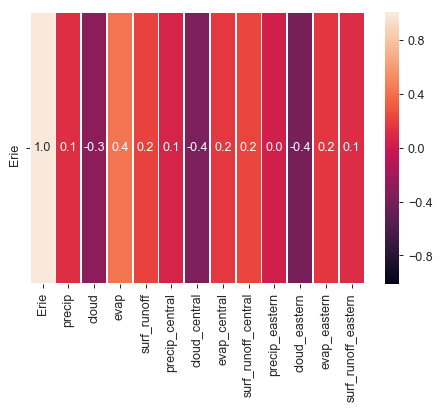

In [490]:
sns.heatmap(test.corr()[0:1], annot=True, fmt='.1f', vmin=-1.01, vmax=1.01, linewidths=.5,)

In [491]:
test.corr()[0:1]

,Erie,precip,cloud,evap,surf_runoff,precip_central,cloud_central,evap_central,surf_runoff_central,precip_eastern,cloud_eastern,evap_eastern,surf_runoff_eastern
Erie,1.0,0.118657,-0.30449,0.424139,0.218844,0.069066,-0.365028,0.168416,0.228543,0.03779,-0.395741,0.163524,0.116016


In [492]:
stclair_river_level = pd.read_csv('../../measurements/St. Clair/stclair_river_level_hydat.csv')
stclair_river_level['Date'] = pd.to_datetime(stclair_river_level['Date'])

In [493]:
stclair_river_level_m = stclair_river_level.groupby(pd.Grouper(key='Date', freq='M')).mean()['Value'].to_frame()

In [494]:
stclair_river_level_m['year']= stclair_river_level_m.index.year
stclair_river_level_m['month']= stclair_river_level_m.index.month
stclair_river_level_m['month']= stclair_river_level_m['month'].apply(lambda x: calendar.month_abbr[x]).apply(lambda x: x.lower())

In [495]:
res = pd.merge(res, stclair_river_level_m, how='inner', left_on=['year','Month'], right_on = ['year','month'])

In [496]:
test  = res[['Erie', 'Value', 'precip', 'cloud', 'evap', 'surf_runoff', 
            'precip_central', 'cloud_central', 'evap_central', 'surf_runoff_central',
           'precip_eastern', 'cloud_eastern', 'evap_eastern', 'surf_runoff_eastern']]

In [497]:
test.corr()[0:1]

,Erie,Value,precip,cloud,evap,surf_runoff,precip_central,cloud_central,evap_central,surf_runoff_central,precip_eastern,cloud_eastern,evap_eastern,surf_runoff_eastern
Erie,1.0,0.865036,0.118657,-0.30449,0.424139,0.218844,0.069066,-0.365028,0.168416,0.228543,0.03779,-0.395741,0.163524,0.116016


In [498]:
test.describe()

,Erie,Value,precip,cloud,evap,surf_runoff,precip_central,cloud_central,evap_central,surf_runoff_central,precip_eastern,cloud_eastern,evap_eastern,surf_runoff_eastern
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,174.187969,175.220540,87.833326,18.546569,77.723147,2.484960,98.794492,18.837168,76.364827,2.519028,106.056093,19.139171,72.112066,3.631029
std,0.228752,0.239044,36.244378,3.484056,49.889137,2.601869,37.574593,3.950699,49.807758,2.600310,38.308460,3.928125,43.239136,2.935933
min,173.730000,174.733043,23.421748,10.887917,10.870849,0.046739,32.189919,10.668470,6.900108,0.042568,34.370563,10.827770,9.757328,0.139551
25%,174.007500,175.059435,61.440809,15.804373,29.390733,0.757418,70.445461,15.556577,30.162914,0.747032,77.736135,15.799752,33.096455,1.468222
50%,174.200000,175.171998,82.445697,18.841398,66.236192,1.580618,90.932722,18.984334,71.661762,1.670093,100.888724,19.126580,65.394204,2.738559
75%,174.340000,175.373065,111.403993,21.227551,116.748547,3.155106,120.352621,21.989715,112.963845,3.173119,127.981195,21.867206,103.340229,5.070750
max,174.830000,175.914463,254.738710,25.959539,176.914233,16.195519,269.267808,26.996114,182.319573,15.261153,254.315528,27.200919,169.939439,16.490535


In [499]:
nino4_agg['month'] = nino4_agg['M_n'].apply(lambda x: calendar.month_abbr[x]).apply(lambda x: x.lower())

In [500]:
res = pd.merge(res, nino4_agg, how='inner', left_on=['year','Month'], right_on = ['Year','month'])

In [501]:
res.head()

,month_x,year,Erie,date,precip,cloud,evap,surf_runoff,month_western,Month,date_central,precip_central,cloud_central,evap_central,surf_runoff_central,month_central,Month_central,date_eastern,precip_eastern,cloud_eastern,evap_eastern,surf_runoff_eastern,month_eastern,Month_eastern,Value,month_y,Year,level_1,0,M_n,month
0,jan,2002,173.85,2002-01-31,67.934696,20.815226,16.876215,0.601798,1,jan,2002-01-31,72.433403,22.448931,38.152542,0.650474,1,jan,2002-01-31,88.075411,23.214792,42.812938,1.458582,1,jan,174.944517,jan,2002,January,0.27,1,jan
1,feb,2002,173.97,2002-02-28,68.206412,17.624926,28.966410,1.788352,2,feb,2002-02-28,71.871380,19.751946,42.116062,1.705362,2,feb,2002-02-28,79.443793,21.165675,42.022553,2.725744,2,feb,174.993928,feb,2002,February,0.25,2,feb
2,mar,2002,174.02,2002-03-31,79.551678,24.496153,37.288934,1.890370,3,mar,2002-03-31,90.593701,24.333257,41.061339,1.992714,3,mar,2002-03-31,102.194141,24.404504,41.618727,3.536823,3,mar,175.009656,mar,2002,March,0.26,3,mar
3,apr,2002,174.20,2002-04-30,139.311444,20.324719,65.881641,5.655855,4,apr,2002-04-30,128.510174,19.856449,28.544239,5.058949,4,apr,2002-04-30,137.222506,19.433079,31.634666,6.032884,4,apr,175.106665,apr,2002,April,0.37,4,apr
4,may,2002,174.30,2002-05-31,117.833204,17.738306,103.921073,4.225667,5,may,2002-05-31,125.260726,17.428374,81.283150,4.520237,5,may,2002-05-31,140.201716,17.752493,68.654478,7.447405,5,may,175.207419,may,2002,May,0.37,5,may


In [502]:
# test  = res[['Erie', '0_x', 'precip', 'cloud', 'evap', 'surf_runoff', 
#             'precip_x', 'cloud_x', 'evap_x', 'surf_runoff_x',
#            'precip_y', 'cloud_y', 'evap_y', 'surf_runoff_y']]




In [503]:


test  = res[['Erie', 0, 'Value', 'precip', 'cloud', 'evap', 'surf_runoff', 
            'precip_central', 'cloud_central', 'evap_central', 'surf_runoff_central',
           'precip_eastern', 'cloud_eastern', 'evap_eastern', 'surf_runoff_eastern']]

In [504]:
test.corr()[0:1].values

array([[ 1.        ,  0.10488021,  0.86503646,  0.11865739, -0.30449049,
         0.42413902,  0.21884417,  0.06906554, -0.36502766,  0.1684156 ,
         0.22854326,  0.03779017, -0.3957415 ,  0.16352377,  0.1160161 ]])

In [505]:
range(len(test.corr()[0:1].columns))

range(0, 15)

In [506]:
correlation = test.corr()['Erie'].to_dict()
correlation_sorted = sorted(correlation.items(), key=operator.itemgetter(1))
correlation_sorted

[('cloud_eastern', -0.3957414998113369),
 ('cloud_central', -0.3650276577951688),
 ('cloud', -0.30449049023115576),
 ('precip_eastern', 0.03779017024065968),
 ('precip_central', 0.06906554035546929),
 (0, 0.10488021250979065),
 ('surf_runoff_eastern', 0.11601610380617651),
 ('precip', 0.11865738856799253),
 ('evap_eastern', 0.16352377211634764),
 ('evap_central', 0.16841559795069908),
 ('surf_runoff', 0.21884416829333667),
 ('surf_runoff_central', 0.22854326094195332),
 ('evap', 0.4241390150010611),
 ('Value', 0.8650364634368328),
 ('Erie', 1.0)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

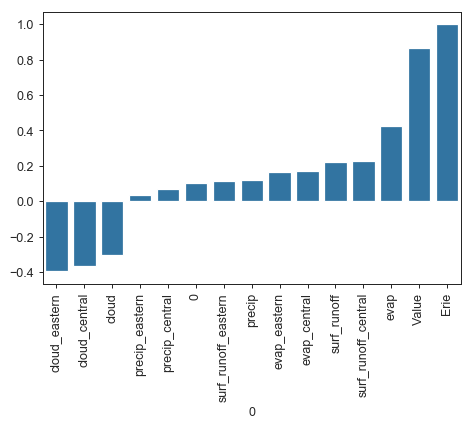

In [507]:
sns.barplot(data=pd.DataFrame(correlation_sorted).set_index(0).T, color=sns.color_palette()[0])
plt.xticks(rotation=90)

([<matplotlib.axis.YTick at 0xa321cc4e0>,
 <a list of 15 Text yticklabel objects>)

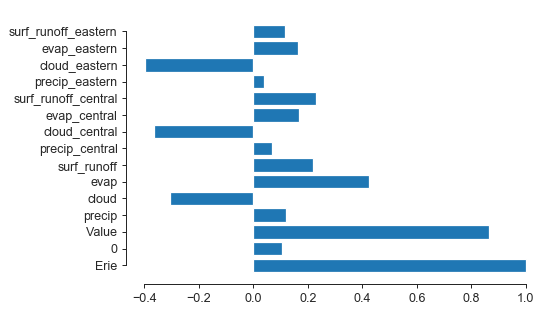

In [508]:
plt.barh(range(len(test.corr()[0:1].columns)), test.corr()[0:1].values[0])
sns.despine(trim=True)
plt.yticks(range(len(test.corr()[0:1].columns)), test.corr()[0:1].columns, rotation=0)

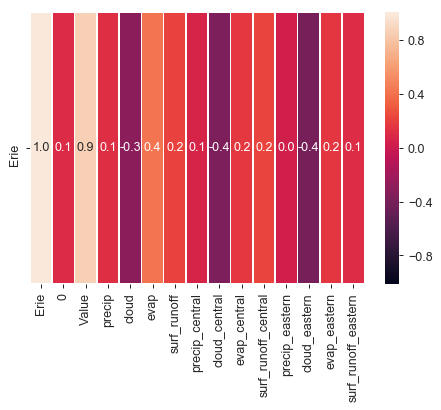

In [509]:
sns.heatmap(test.corr()[0:1], annot=True, fmt='.1f', vmin=-1.01, vmax=1.01, linewidths=.5,)

In [510]:
# from sklearn.decomposition import PCA
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import GaussianNB

# std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
# std_clf.fit(train[features], train[target])
# pred_test_std = std_clf.predict(test[features])

# # Extract PCA from pipeline
# # pca = unscaled_clf.named_steps['pca']
# pca_std = std_clf.named_steps['pca']

# # X_train_transformed = pca.transform(train)
# # scaler = std_clf.named_steps['standardscaler']
# X_train_std_transformed = pca_std.transform(scaler.transform(train))

RandomForestRegressor method score: score
mean_squared_error : 0.006175431336844497
r2_score : 0.7972147636139555
median_absolute_error : 0.05317999999957124
explained_variance_score : 0.8063860733538893


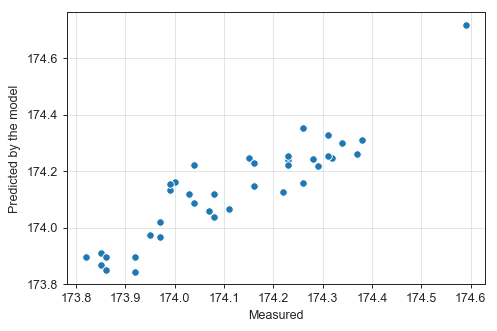

In [511]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

model = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1, random_state=1, n_jobs=6)
features = list(test.columns[1:])
target = [test.columns[0]]
train = test.sample(frac=0.8, random_state=1)
test = test.loc[~test.index.isin(train.index)]

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, explained_variance_score, accuracy_score

metrics = [mean_squared_error, r2_score, median_absolute_error, explained_variance_score]

results = pd.DataFrame({})
models = [model]
for i,model in enumerate(models):
    name = str(model).split('(')[0]
    results[name] = {}
    model.fit(train[features], train[target])
    results[name] = {'score': model.score(test[features], test[target]), 'model':name}
    print(str(model).split('(')[0], 'method score:', results[name]['score'])
    
    for m in metrics:
        results[name][m.__name__] = m(model.predict(test[features]), test[target].values)
        print(m.__name__,':', results[name][m.__name__])
#     predicted_results[i,:] = model.predict(test[features]).flatten()
    plt.figure()
    sns.scatterplot(x=test[target].values.flatten(), y=model.predict(test[features]).flatten())
#     plt.scatter(model.predict(test[features]), test[target].values)
#     plt.ylim(0,10)
    plt.ylabel('Predicted by the model')
    plt.xlabel('Measured')
    # plt.xlim(0,10)
    plt.grid(alpha=0.5)
#     plt.ylim(-1,11)
#     plt.xlim(-1,11)
    plt.show()

In [512]:
test.head()

,Erie,0,Value,precip,cloud,evap,surf_runoff,precip_central,cloud_central,evap_central,surf_runoff_central,precip_eastern,cloud_eastern,evap_eastern,surf_runoff_eastern
1,173.97,0.25,174.993928,68.206412,17.624926,28.966410,1.788352,71.871380,19.751946,42.116062,1.705362,79.443793,21.165675,42.022553,2.725744
7,174.15,0.62,175.259999,75.891131,15.353435,146.795660,0.557582,86.651983,13.846420,166.503830,0.998834,69.421348,13.384748,158.734744,1.371540
8,174.04,0.62,175.178333,73.795580,11.214920,113.413004,1.443692,79.360445,11.579939,129.605459,0.981393,77.830351,12.690118,120.119221,2.821582
20,174.04,0.26,175.041666,145.878230,12.414124,118.105538,4.055468,160.075874,13.491899,127.696079,4.195346,130.650636,14.996746,125.568495,5.828528
22,173.85,0.55,174.914667,111.198483,22.475854,52.955342,2.469686,117.727836,23.156443,63.866049,2.535450,126.792207,23.542258,61.253282,5.359493


In [513]:
res['dWLSC'] = res.Value.diff()

In [514]:
res['dWLLE'] = res.Erie.diff()

In [515]:
import operator

importance = {f:v for f,v in zip(features, models[0].feature_importances_)}
importance_sorted = sorted(importance.items(), key=operator.itemgetter(1))

In [516]:
importance_sorted

[('cloud_central', 0.005648414127845434),
 ('cloud', 0.007021970139044461),
 ('precip', 0.007575248642673798),
 ('evap_central', 0.008089352252663839),
 ('surf_runoff_eastern', 0.008532729794141962),
 ('precip_central', 0.008585619926647853),
 ('cloud_eastern', 0.00963856600913174),
 ('precip_eastern', 0.009795395087123503),
 ('evap_eastern', 0.011538822098736013),
 ('surf_runoff', 0.016594937191720026),
 ('surf_runoff_central', 0.01863461412137194),
 (0, 0.022432042513062),
 ('evap', 0.03503867631147847),
 ('Value', 0.8308736117843595)]

In [517]:
[i[1] for i in importance_sorted][::-1]

[0.8308736117843595,
 0.03503867631147847,
 0.022432042513062,
 0.01863461412137194,
 0.016594937191720026,
 0.011538822098736013,
 0.009795395087123503,
 0.00963856600913174,
 0.008585619926647853,
 0.008532729794141962,
 0.008089352252663839,
 0.007575248642673798,
 0.007021970139044461,
 0.005648414127845434]

In [518]:
[i[0] for i in importance_sorted][::-1]

['Value',
 'evap',
 0,
 'surf_runoff_central',
 'surf_runoff',
 'evap_eastern',
 'precip_eastern',
 'cloud_eastern',
 'precip_central',
 'surf_runoff_eastern',
 'evap_central',
 'precip',
 'cloud',
 'cloud_central']

In [519]:
data = pd.DataFrame({'features': [i[0] for i in importance_sorted], 'importance': [i[1] for i in importance_sorted]})

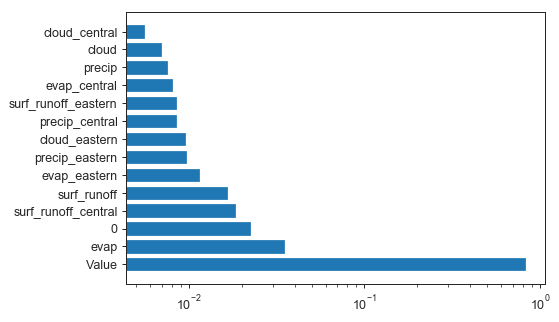

In [520]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()

ax.barh(range(len(importance_sorted)), [i[1] for i in importance_sorted][::-1], color=sns.color_palette()[0])
plt.yticks(range(len(importance_sorted)), [i[0] for i in importance_sorted][::-1], rotation=0)
ax.set_xscale('log')
plt.show()

In [521]:
[i[0] for i in importance_sorted]

['cloud_central',
 'cloud',
 'precip',
 'evap_central',
 'surf_runoff_eastern',
 'precip_central',
 'cloud_eastern',
 'precip_eastern',
 'evap_eastern',
 'surf_runoff',
 'surf_runoff_central',
 0,
 'evap',
 'Value']

In [522]:
# Cloud Cover Eastern
# Cloud Cover Central
# Precipitation Central
# Evaporation Cent

(0.004400946699966904, 1)

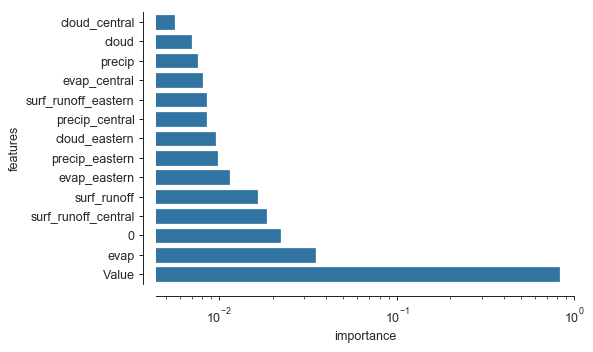

In [523]:
ax = sns.barplot(y="features", x="importance", data=data, color=sns.color_palette()[0])
sns.despine(offset=10)
ax.set_xscale('log')
ax.set_xlim(None, 1)

In [524]:
Precip_mm = pd.read_excel('../../measurements/glerl/Precip_Lake.xlsx', sheetname='ERI_mm', skiprows=3)
Precip_mm['Total'] = pd.to_numeric(Precip_mm['Total'], errors='coerce')
Precip_mm['Year'] = pd.to_numeric(Precip_mm['Year'], errors='coerce')

Runoff_mm = pd.read_excel('../../measurements/glerl/Runoff.xlsx', sheetname='ERI_mm', skiprows=4)

Runoff_mm['Ann'] = pd.to_numeric(Runoff_mm['Ann'], errors='coerce')
Runoff_mm['YEAR'] = pd.to_numeric(Runoff_mm['YEAR'], errors='coerce')

In [525]:
Precip_mm.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Total
0,1900.0,55.1,108.5,65.8,43.2,47.8,69.6,125.7,73.7,49.3,55.4,100.3,22.9,817.3
1,1901.0,49.3,43.7,66.0,69.1,75.9,61.5,77.7,79.5,65.8,31.8,58.2,100.1,778.6
2,1902.0,39.9,28.2,57.7,41.1,94.0,151.9,156.0,34.0,124.0,59.9,43.9,69.6,900.2
3,1903.0,51.1,83.6,62.7,100.8,49.3,104.9,138.9,117.9,47.8,61.5,41.4,58.7,918.6
4,1904.0,105.9,71.6,101.1,67.8,80.8,37.8,91.7,78.0,71.6,55.4,7.1,55.1,823.9


In [526]:
Precip_mm_agg = Precip_mm[Precip_mm.columns[:-1]].groupby('Year').mean()[Precip_mm.columns[1:-1]].stack().reset_index()
Precip_mm_agg['month'] = Precip_mm_agg['level_1'].apply(lambda x: datetime.strptime(x.lower(), '%b').month)
Precip_mm_agg['month'] = Precip_mm_agg['month'].apply(lambda x: calendar.month_abbr[x]).apply(lambda x: x.lower())
Precip_mm_agg['Precip'] = Precip_mm_agg[0]
Precip_mm_agg = Precip_mm_agg[['Year', 'month', 'Precip']]



In [527]:
Runoff_mm.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Ann
0,1898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.025382,92.167183,NaN
1,1899.0,118.415503,62.084014,211.980248,67.197348,21.708588,11.161737,3.111946,14.860430,2.734207,0.524216,5.534979,25.336413,543.756719
2,1900.0,55.131268,78.503511,170.372294,86.150213,10.264421,36.353556,22.838310,6.138434,0.283405,0.442926,27.648672,16.493525,514.184050
3,1901.0,26.068023,36.621228,122.303873,38.493721,34.337713,37.952125,27.317596,0.521089,0.443767,2.684653,1.034783,28.207616,355.681905
4,1902.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [528]:
Runoff_mm_agg = Runoff_mm[Runoff_mm.columns[:-1]].groupby('YEAR').mean()[Runoff_mm.columns[1:-1]].stack().reset_index()
Runoff_mm_agg['month'] = Runoff_mm_agg['level_1'].apply(lambda x: datetime.strptime(x.lower(), '%b').month)
Runoff_mm_agg['month'] = Runoff_mm_agg['month'].apply(lambda x: calendar.month_abbr[x]).apply(lambda x: x.lower())
Runoff_mm_agg['Runoff'] = Runoff_mm_agg[0]
Runoff_mm_agg = Runoff_mm_agg[['YEAR', 'month', 'Runoff']]



In [529]:
res = pd.merge(Precip_mm_agg, Runoff_mm_agg, how='inner', left_on=['Year', 'month'], right_on = ['YEAR', 'month'])[['Year', 'month', 'Precip', 'Runoff']]
                                                                                                                       
                                                                                                                       

In [530]:
res

,Year,month,Precip,Runoff
0,1900.0,jan,55.10,55.131268
1,1900.0,feb,108.50,78.503511
2,1900.0,mar,65.80,170.372294
3,1900.0,apr,43.20,86.150213
4,1900.0,may,47.80,10.264421
5,1900.0,jun,69.60,36.353556
6,1900.0,jul,125.70,22.838310
7,1900.0,aug,73.70,6.138434
8,1900.0,sep,49.30,0.283405
9,1900.0,oct,55.40,0.442926


In [531]:
res = pd.merge(res, nino4_agg[['month', 'Year', 0]], how='inner', left_on=['Year', 'month'], right_on = ['Year', 'month'])[['Year', 'month', 'Precip', 'Runoff', 0]]

In [532]:
res

,Year,month,Precip,Runoff,0
0,1900.0,jan,55.10,55.131268,0.63
1,1900.0,feb,108.50,78.503511,0.58
2,1900.0,mar,65.80,170.372294,0.47
3,1900.0,apr,43.20,86.150213,0.37
4,1900.0,may,47.80,10.264421,0.28
5,1900.0,jun,69.60,36.353556,0.18
6,1900.0,jul,125.70,22.838310,0.22
7,1900.0,aug,73.70,6.138434,0.26
8,1900.0,sep,49.30,0.283405,0.17
9,1900.0,oct,55.40,0.442926,0.26


In [533]:
res = pd.merge(water_level_2[['month', 'year', 'Erie']], res,  how='inner', left_on=['year','month'], right_on = ['Year','month'])


In [534]:
res = pd.merge(res, stclair_river_level_m, how='inner', left_on=['Year','month'], right_on = ['year','month'])

RandomForestRegressor method score: score
mean_squared_error : 0.1411487597868743
r2_score : -3.702733106731663
median_absolute_error : 0.2597100000003536
explained_variance_score : -3.6507120490274465


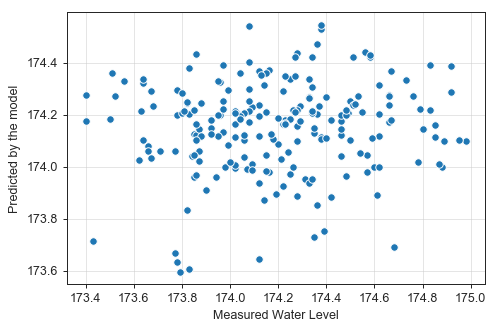

In [535]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
test = res[['Erie', 'Precip', 'Runoff', 0]].dropna()
model = RandomForestRegressor(n_estimators=1000, n_jobs=6)
features = list(test.columns[1:])
target = [test.columns[0]]
train = test.sample(frac=0.8, random_state=1)
test = test.loc[~test.index.isin(train.index)]

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, explained_variance_score, accuracy_score

metrics = [mean_squared_error, r2_score, median_absolute_error, explained_variance_score]

results = pd.DataFrame({})
models = [model]
for i,model in enumerate(models):
    name = str(model).split('(')[0]
    results[name] = {}
    model.fit(train[features], train[target])
    results[name] = {'score': model.score(test[features], test[target]), 'model':name}
    print(str(model).split('(')[0], 'method score:', results[name]['score'])
    
    for m in metrics:
        results[name][m.__name__] = m(model.predict(test[features]), test[target].values)
        print(m.__name__,':', results[name][m.__name__])
#     predicted_results[i,:] = model.predict(test[features]).flatten()
    plt.figure()
    sns.scatterplot(x=test[target].values.flatten(), y=model.predict(test[features]).flatten())
#     plt.scatter(model.predict(test[features]), test[target].values)
#     plt.ylim(0,10)
    plt.ylabel('Predicted by the model')
    plt.xlabel('Measured Water Level')
#     plt.xlim(173.25,175)
#     plt.ylim(173.25,175)
    # plt.xlim(0,10)
    plt.grid(alpha=0.5)
#     plt.ylim(-1,11)
#     plt.xlim(-1,11)
    plt.show()

In [536]:
import operator

importance = {f:v for f,v in zip(features, models[0].feature_importances_)}
importance_sorted = sorted(importance.items(), key=operator.itemgetter(1))

In [537]:
importance_sorted

[(0, 0.28640721257441176),
 ('Precip', 0.33707607699787207),
 ('Runoff', 0.3765167104277161)]

In [538]:
test.corr()[0:1]

,Erie,Precip,Runoff,0
Erie,1.0,0.119092,0.124261,0.043651


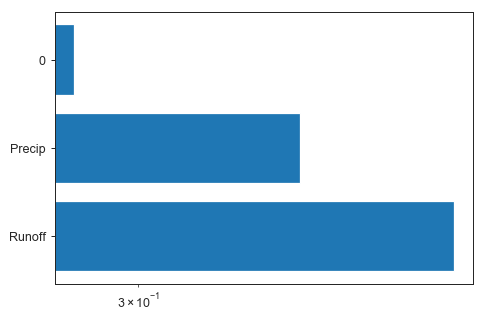

In [539]:
import operator

importance = {f:v for f,v in zip(features, models[0].feature_importances_)}
importance_sorted = sorted(importance.items(), key=operator.itemgetter(1))

import matplotlib.pyplot as plt
f, ax = plt.subplots()
# importance_sorted = list(importance_sorted[0:3]) + list([importance_sorted[4]])
ax.barh(range(len(importance_sorted)), [i[1] for i in importance_sorted][::-1], color=sns.color_palette()[0])
plt.yticks(range(len(importance_sorted)), [i[0] for i in importance_sorted][::-1], rotation=0)
ax.set_xscale('log')
plt.show()

In [541]:
# pd.tools.plotting.scatter_matrix(res[['Erie', 'Precip', 'Runoff', 0, 'Value', 'Year']].dropna(), diagonal="kde")
# plt.tight_layout()
# plt.show()

In [546]:
res = res.rename(columns={0:'ENSO', 'Erie': 'Water Level LE', 'Value': 'Water Level SCR', 'Precip': 'Precipitation',})

In [547]:
res.loc[res['ENSO'] < 0, 'ENSOP'] = '-'
res.loc[res['ENSO'] >= 0, 'ENSOP'] = '+'

In [549]:
res.columns

Index(['month', 'year_x', 'Water Level LE', 'Year', 'Precipitation', 'Runoff',
       'ENSO', 'Water Level SCR', 'year_y', 'ENSOP'],
      dtype='object')

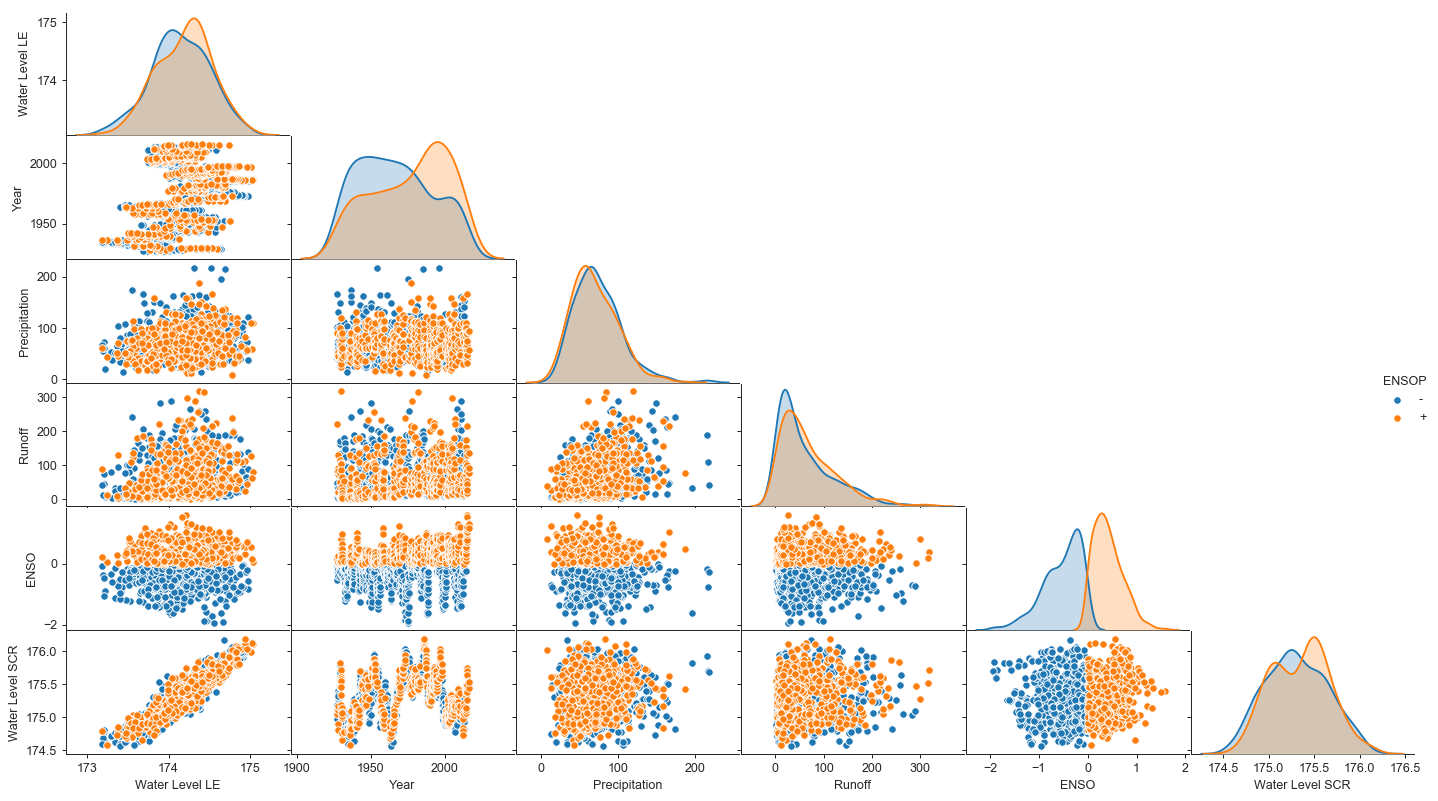

In [560]:
# f, ax = plt.subplots(figsize=(6,4), dpi=90)

g = sns.pairplot(data=res[[ 'Water Level LE', 'Year', 'Precipitation', 'Runoff',
       'ENSO', 'Water Level SCR', 'ENSOP']], hue='ENSOP',)

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
# g.map_upper(sns.kdeplot, cmap="Blues_d")
g.fig.set_size_inches(16,9)
plt.tight_layout(w_pad=0.01, h_pad=0.01)
plt.subplots_adjust(hspace=0.01, wspace=0.01)

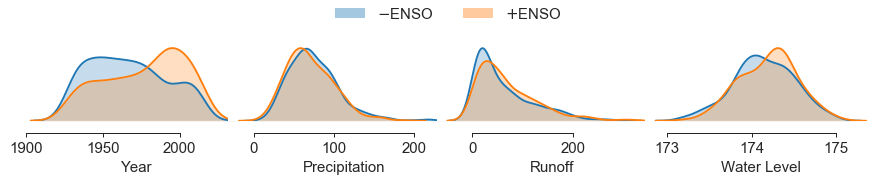

In [686]:
import matplotlib.patches as mpatches

f, axes = plt.subplots(1,4, figsize=(10,2), dpi=90)

sns.kdeplot(res[res.ENSOP=='-']['Year'], shade=True, color=sns.color_palette()[0],ax=axes[0])
sns.kdeplot(res[res.ENSOP=='+']['Year'], shade=True, color=sns.color_palette()[1],ax=axes[0])

sns.kdeplot(res[res.ENSOP=='-']['Precipitation'], shade=True, color=sns.color_palette()[0],ax=axes[1])
sns.kdeplot(res[res.ENSOP=='+']['Precipitation'], shade=True, color=sns.color_palette()[1],ax=axes[1])

sns.kdeplot(res[res.ENSOP=='-']['Runoff'], shade=True, color=sns.color_palette()[0],ax=axes[2])
sns.kdeplot(res[res.ENSOP=='+']['Runoff'], shade=True, color=sns.color_palette()[1],ax=axes[2])

sns.kdeplot(res[res.ENSOP=='-']['Water Level LE'], shade=True, color=sns.color_palette()[0],ax=axes[3])
sns.kdeplot(res[res.ENSOP=='+']['Water Level LE'], shade=True, color=sns.color_palette()[1],ax=axes[3])

sns.despine(trim=True, offset=10)


for ax, label in zip(axes, ['Year', 'Precipitation', 'Runoff', 'Water Level']):
    ax.get_legend().remove()
    ax.get_yaxis().set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel(label, fontsize='large')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
plt.tight_layout()
plt.subplots_adjust(hspace=-1, wspace=-0.1, top=0.8)


# handles, labels = axes[0].get_legend_handles_labels()
# handles[2:], ['$-$ENSO', '$+$ENSO']

patch0 = mpatches.Patch(facecolor=sns.color_palette()[0], alpha=0.4, linewidth=0)
patch1 = mpatches.Patch(facecolor=sns.color_palette()[1], alpha=.4, linewidth=0)

f.legend( [patch0, patch1], ['$-$ENSO', '$+$ENSO'], loc = (0.37, 0.85), ncol=2, frameon=0, framealpha=0.5, fontsize='large')



# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/kde_distribution.pdf', dpi=f.dpi)




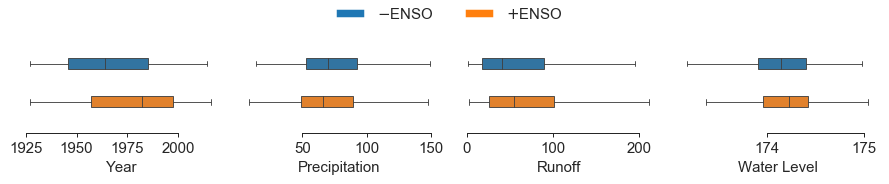

In [713]:
import matplotlib.patches as mpatches

f, axes = plt.subplots(1,4, figsize=(10,2), dpi=90)


sns.boxplot(x='Year', y='ENSOP', data=res, ax=axes[0], showfliers=False, linewidth=0.7, width=0.3)
sns.boxplot(x='Precipitation', y='ENSOP', data=res, ax=axes[1], showfliers=False, linewidth=0.7, width=0.3)
sns.boxplot(x='Runoff', y='ENSOP', data=res, ax=axes[2], showfliers=False, linewidth=0.7,  width=0.3)
sns.boxplot(x='Water Level LE', y='ENSOP', data=res, ax=axes[3], showfliers=False, linewidth=0.7, width=0.3)

# sns.kdeplot(res[res.ENSOP=='-']['Year'], shade=True, color=sns.color_palette()[0],ax=axes[0])
# sns.kdeplot(res[res.ENSOP=='+']['Year'], shade=True, color=sns.color_palette()[1],ax=axes[0])

# sns.kdeplot(res[res.ENSOP=='-']['Precipitation'], shade=True, color=sns.color_palette()[0],ax=axes[1])
# sns.kdeplot(res[res.ENSOP=='+']['Precipitation'], shade=True, color=sns.color_palette()[1],ax=axes[1])

# sns.kdeplot(res[res.ENSOP=='-']['Runoff'], shade=True, color=sns.color_palette()[0],ax=axes[2])
# sns.kdeplot(res[res.ENSOP=='+']['Runoff'], shade=True, color=sns.color_palette()[1],ax=axes[2])

# sns.kdeplot(res[res.ENSOP=='-']['Water Level LE'], shade=True, color=sns.color_palette()[0],ax=axes[3])
# sns.kdeplot(res[res.ENSOP=='+']['Water Level LE'], shade=True, color=sns.color_palette()[1],ax=axes[3])

sns.despine(trim=True, offset=10)


for ax, label in zip(axes, ['Year', 'Precipitation', 'Runoff', 'Water Level']):
#     ax.get_legend().remove()
    ax.get_yaxis().set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel(label, fontsize='large')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
plt.tight_layout()
plt.subplots_adjust(hspace=-1, wspace=0.1, top=0.8)


# handles, labels = axes[0].get_legend_handles_labels()
# handles[2:], ['$-$ENSO', '$+$ENSO']

patch0 = mpatches.Patch(facecolor=sns.color_palette()[0], alpha=1, linewidth=2)
patch1 = mpatches.Patch(facecolor=sns.color_palette()[1], alpha=1, linewidth=2)

f.legend( [patch0, patch1], ['$-$ENSO', '$+$ENSO'], loc = (0.37, 0.85), ncol=2, frameon=0, framealpha=0.5, fontsize='large')



# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/kde_distribution.pdf', dpi=f.dpi)


